## 3.6
### Task 1

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [6]:
fit <- glm(am ~ disp + vs + mpg, data = mtcars, family = 'binomial')
summary(fit)


Call:
glm(formula = am ~ disp + vs + mpg, family = "binomial", data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1115  -0.5412  -0.1474   0.2127   2.2639  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.89136    7.26516   0.260   0.7946  
disp        -0.02525    0.01562  -1.617   0.1059  
vs          -5.45385    2.79897  -1.949   0.0514 .
mpg          0.28419    0.24442   1.163   0.2450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.23  on 31  degrees of freedom
Residual deviance: 19.90  on 28  degrees of freedom
AIC: 27.9

Number of Fisher Scoring iterations: 6


In [7]:
fit$coefficients

(Intercept)        disp          vs         mpg 
 1.89136001 -0.02525354 -5.45384569  0.28418829

### Task 2

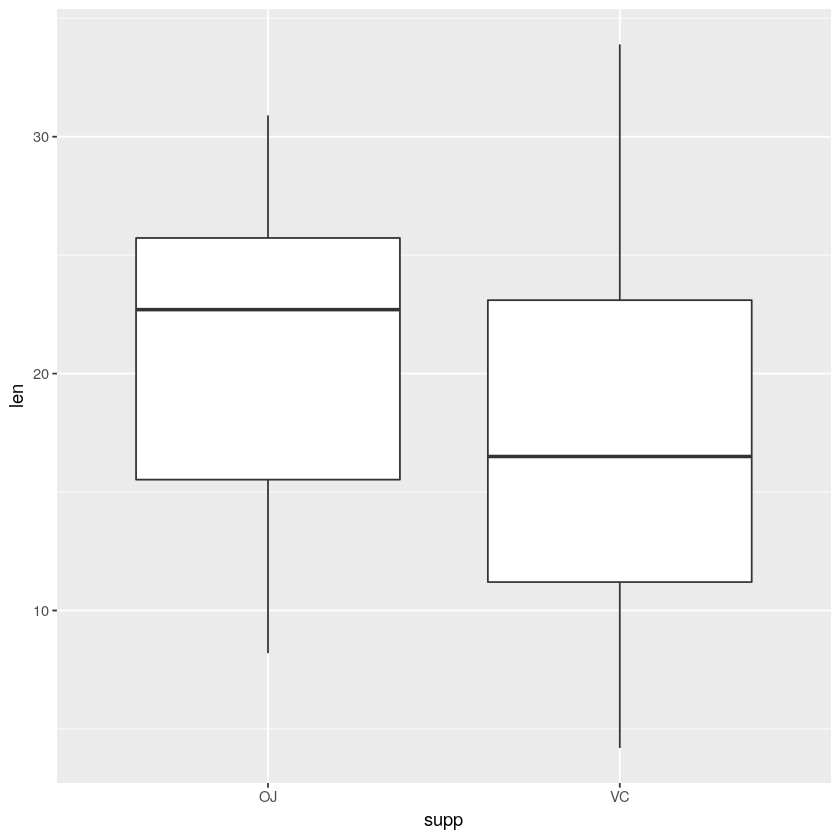

In [32]:
library("ggplot2")

obj <- ggplot(data = ToothGrowth, aes(x = supp, y = len, fill = dose)) +
    geom_boxplot()

obj

### Question 1

In [39]:
df <- read.csv('https://stepic.org/media/attachments/lesson/11478/data.csv')

In [40]:
head(df)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
NA,800,4.00,1
NA,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [49]:
df$admit <- as.factor(df$admit)
df$rank <- as.factor(df$rank)

train <- df[!is.na(df$admit), ]
final <- df[is.na(df$admit), ]

In [50]:
head(train)

,admit,gre,gpa,rank
1,0,380,3.61,3
2,1,660,3.67,3
5,0,520,2.93,4
6,1,760,3.00,2
9,1,540,3.39,3
10,0,700,3.92,2


In [51]:
head(final)

,admit,gre,gpa,rank
3,NA,800,4.00,1
4,NA,640,3.19,4
7,NA,560,2.98,1
8,NA,400,3.08,2
11,NA,800,4.00,4
12,NA,440,3.22,1


In [52]:
fit <- glm(admit ~ rank * gpa, data = train, family = 'binomial')

In [56]:
sum(predict(fit, final, type = 'response') >= 0.4)

[1] 56